<a href="https://colab.research.google.com/github/VinayProgram/machine-learning/blob/main/sklearn_acme_insruance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from urllib.request import urlretrieve
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import plotly.express as px
import numpy as np
import torch
from sklearn.model_selection import train_test_split

In [ ]:
acme_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"
urlretrieve(acme_url, "acme_dataset.csv")
acme_data = pd.read_csv("acme_dataset.csv")
display(acme_data.head())

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
acme_data['sex'] = acme_data['sex'].map({"female":1,"male":0})
acme_data['smoker'] = acme_data['smoker'].map({"yes":1,"no":0})
acme_data['region'] = acme_data['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [ ]:
acme_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [ ]:
acme_data.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,2.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,2.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


**so there is this data having the relation of age sex bmi children smoker region and charges **



1.   Age and sex does have any relation based on age and sex does the premium price effects
2.   there are permutation and combination between the parameters
3.   to find the relation we need to draw the chart find the relation between the numbers



In [ ]:
px.histogram(acme_data,x='age',y='charges',color='sex',barmode='group')

In [ ]:
px.histogram(acme_data,x='bmi',y='charges',color='sex',barmode='group')

In [ ]:
px.histogram(acme_data,x='age',y='charges',color='smoker',barmode='group')

In [ ]:
fig = px.scatter(acme_data,
                 x='age',
                 y='charges',
                 color='smoker',
                 title='Medical Charges vs. Age by Smoking Status',
                 labels={'age': 'Age', 'charges': 'Medical Charges', 'smoker': 'Smoker (1=Yes, 0=No)'},
                 hover_data=['bmi', 'children', 'sex', 'region'])
fig.show()

In [ ]:
fig = px.histogram(acme_data,
                   x = 'age',
                   y = 'charges',
                   marginal='box',
                   color='sex',
                   color_discrete_sequence=px.colors.sequential.Rainbow,
                   title='Annual Medical Charges: Based on Age and Sex')
fig.update_layout(bargap=0.1)
fig.show()

Text(0.5, 1.0, 'Correlation Matrix')

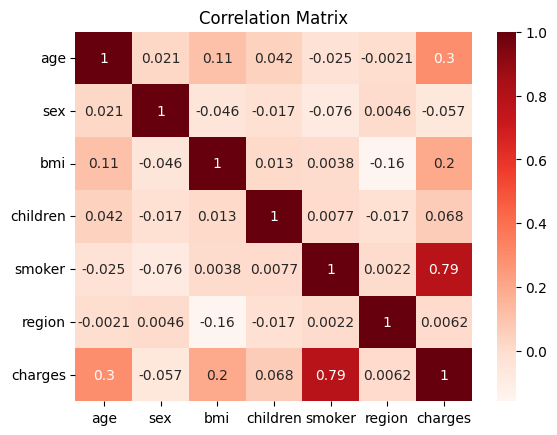

In [ ]:
# The result of .corr is called a correlation matrix and is often visualized using a heatmap.
sns.heatmap(acme_data.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix')

In [ ]:
px.histogram(acme_data,x='age',y='charges',color='sex',barmode='group')

In [ ]:
non_smoker_df = acme_data[acme_data.smoker == 0]
smoker_df = acme_data[acme_data.smoker == 1]


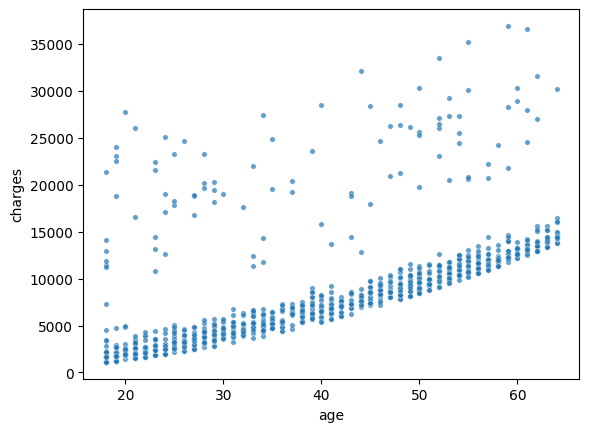

In [ ]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges', alpha=0.7, s=15);

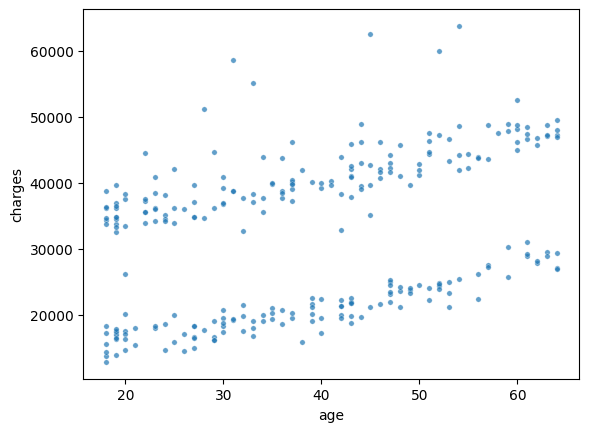

In [ ]:
sns.scatterplot(data=smoker_df, x='age', y='charges', alpha=0.7, s=15);

In [ ]:
# The estimate_charges function is our very first model
def estimate_charges(age, w, b):
    return w * age + b

In [ ]:
w = 200
b = 2000

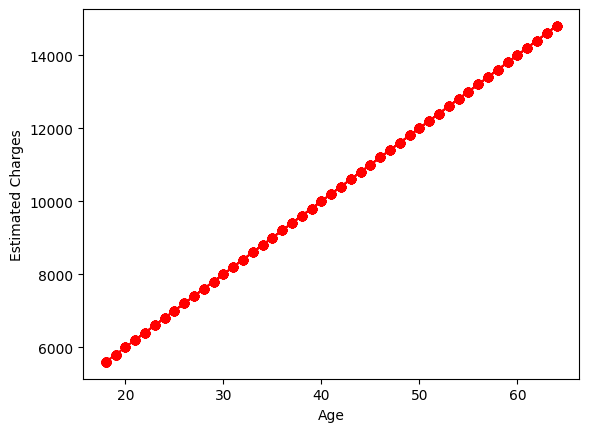

In [ ]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)
plt.plot(ages, estimated_charges, 'r-o');
plt.xlabel('Age');
plt.ylabel('Estimated Charges');

In [ ]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

In [ ]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets-predictions)))

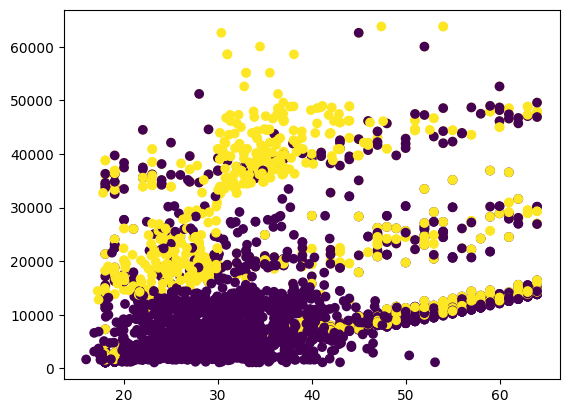

In [ ]:
plt.scatter(x=acme_data['age'],y=acme_data['charges'],c=acme_data['smoker'],cmap='viridis')
plt.scatter(x=acme_data['age'],y=acme_data['charges'],c=acme_data['sex'])
plt.scatter(x=acme_data['bmi'],y=acme_data['charges'],c=acme_data['smoker'])

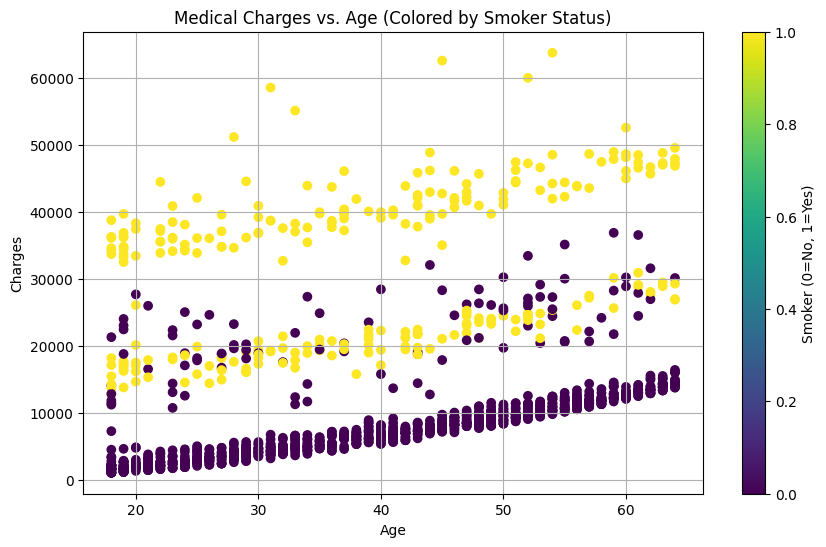

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=acme_data['age'], y=acme_data['charges'], c=acme_data['smoker'], cmap='viridis')
plt.colorbar(label='Smoker (0=No, 1=Yes)')
plt.title('Medical Charges vs. Age (Colored by Smoker Status)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

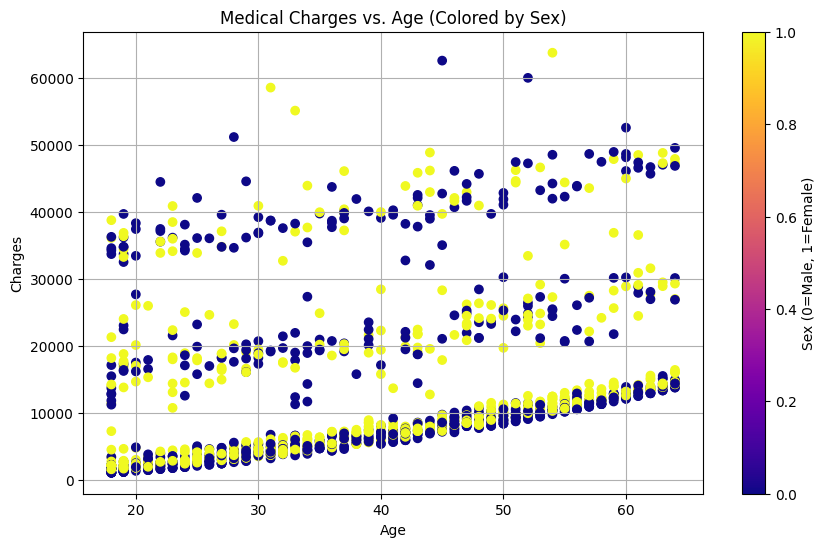

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=acme_data['age'], y=acme_data['charges'], c=acme_data['sex'], cmap='plasma')
plt.colorbar(label='Sex (0=Male, 1=Female)')
plt.title('Medical Charges vs. Age (Colored by Sex)')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

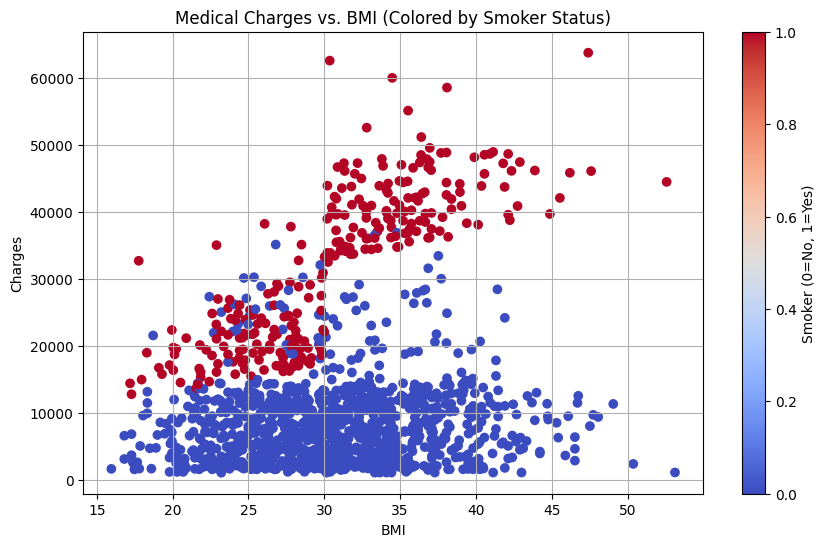

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=acme_data['bmi'], y=acme_data['charges'], c=acme_data['smoker'], cmap='coolwarm')
plt.colorbar(label='Smoker (0=No, 1=Yes)')
plt.title('Medical Charges vs. BMI (Colored by Smoker Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

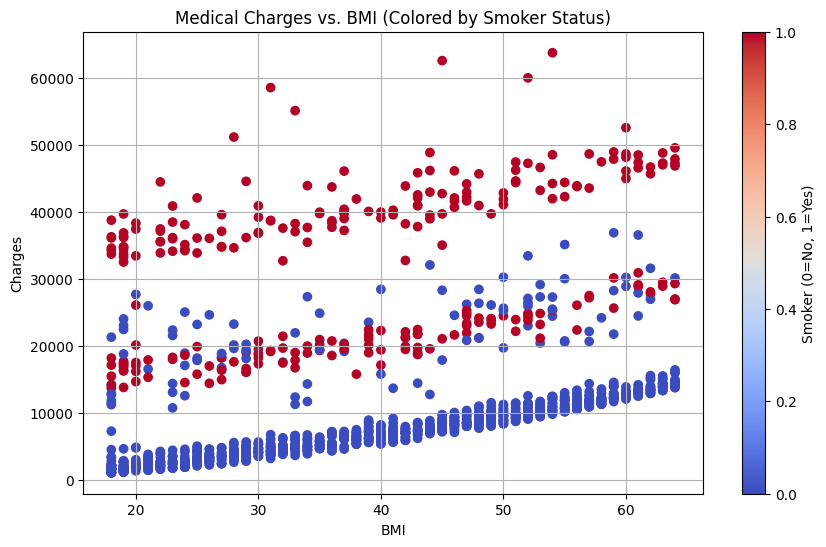

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(x=acme_data['age'], y=acme_data['charges'], c=acme_data['smoker'], cmap='coolwarm')
plt.colorbar(label='Smoker (0=No, 1=Yes)')
plt.title('Medical Charges vs. BMI (Colored by Smoker Status)')
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.grid(True)
plt.show()

In [ ]:
X = torch.tensor(acme_data[['age','sex','bmi','children','smoker','region']].values, dtype=torch.float32)
y = torch.tensor(acme_data[['charges']].values, dtype=torch.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
class Model(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = torch.nn.Linear(in_features=6,out_features=32)
        self.layer2 = torch.nn.Linear(in_features=32,out_features=64)
        self.layer3 = torch.nn.Linear(in_features=64,out_features=32)
        self.layer4 = torch.nn.Linear(in_features=32,out_features=1)
        self.relu = torch.nn.ReLU()
    def forward(self,x):
        return self.layer4(self.relu(self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))))

In [ ]:
model=Model()
loss=torch.nn.MSELoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
def plot_loss(xD,yD,pred):
  plt.figure(figsize=(10,6))

# actual data
  plt.scatter(xD, yD, alpha=0.4, label="Actual data")

# trendline
  plt.plot(xD, pred, color='red', linewidth=3, label="Model trendline")

  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.title("Model Training Trendline (Age vs Charges)")
  plt.legend()
  plt.show()



In [ ]:
def plot_all_features(X, y, pred, feature_names):
    X = X.detach().numpy()
    y = y.detach().numpy()
    pred = pred.detach().numpy()

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        ax.scatter(X[:, i], y, alpha=0.4, label="Actual")
        ax.scatter(X[:, i], pred, alpha=0.4, color='red', label="Predicted")

        ax.set_xlabel(feature_names[i])
        ax.set_ylabel("Charges")
        ax.set_title(f"{feature_names[i]} vs Charges")
        ax.legend()

    plt.tight_layout()
    plt.show()


epoch 0 loss 20895670.0


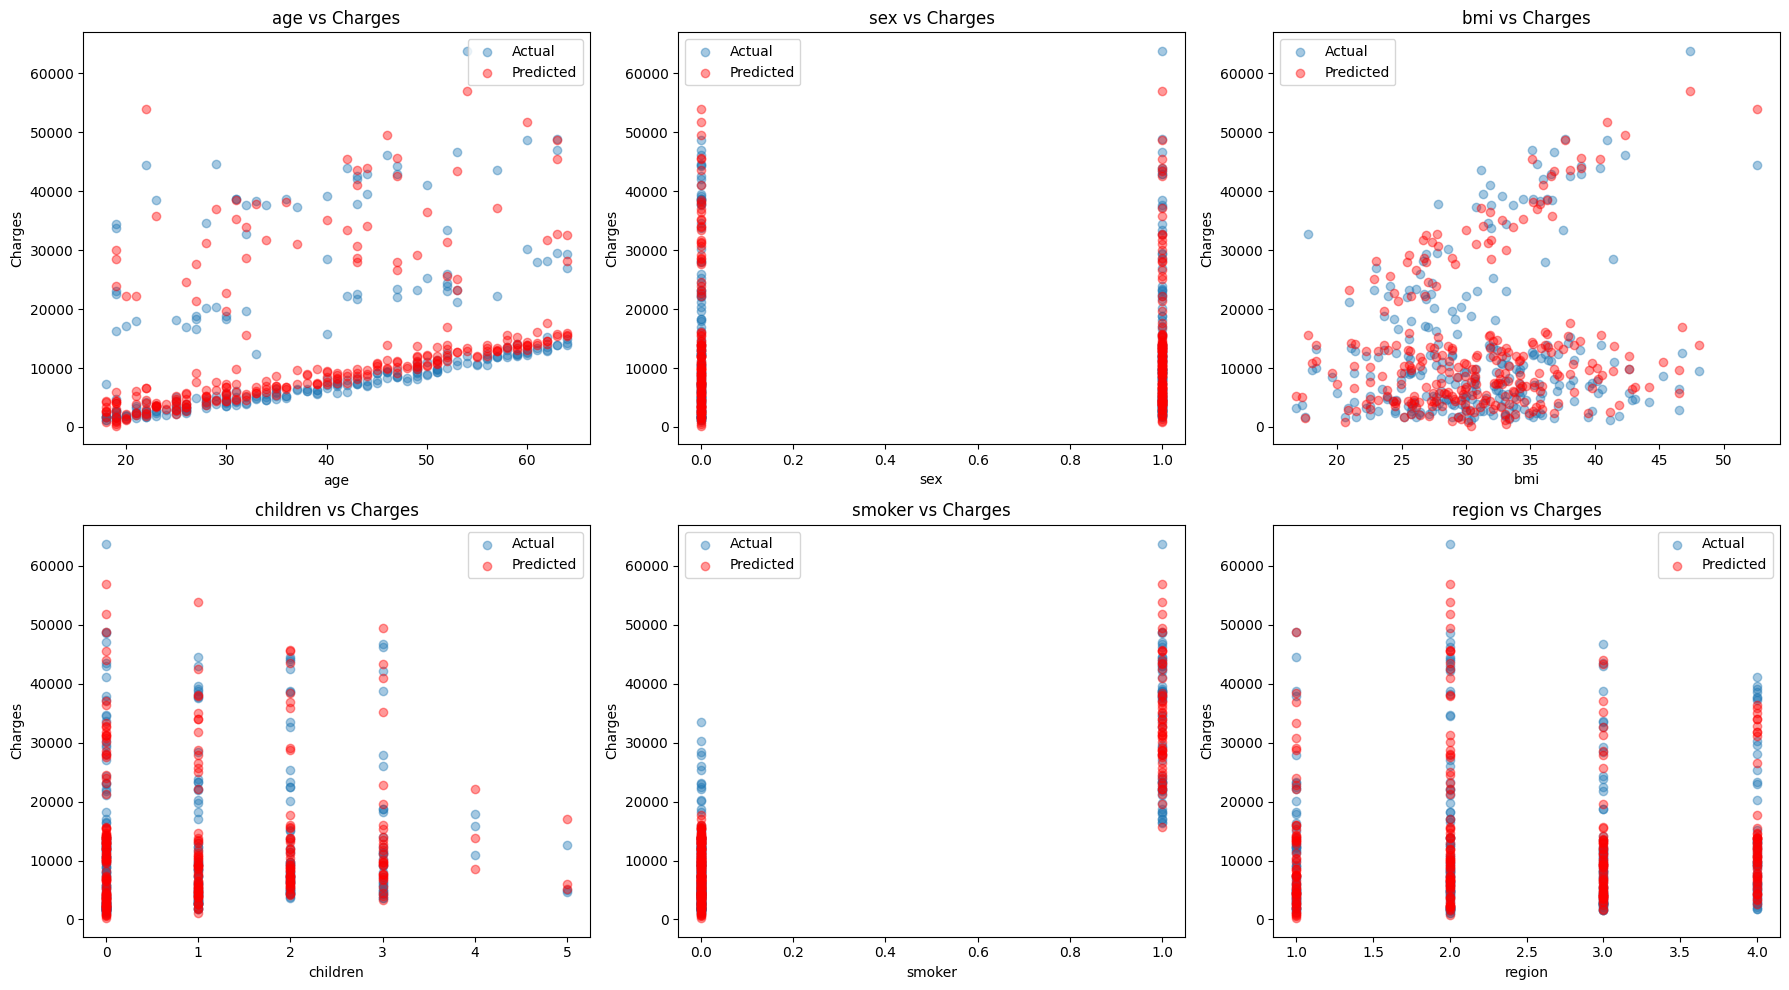

epoch 1000 loss 19703760.0


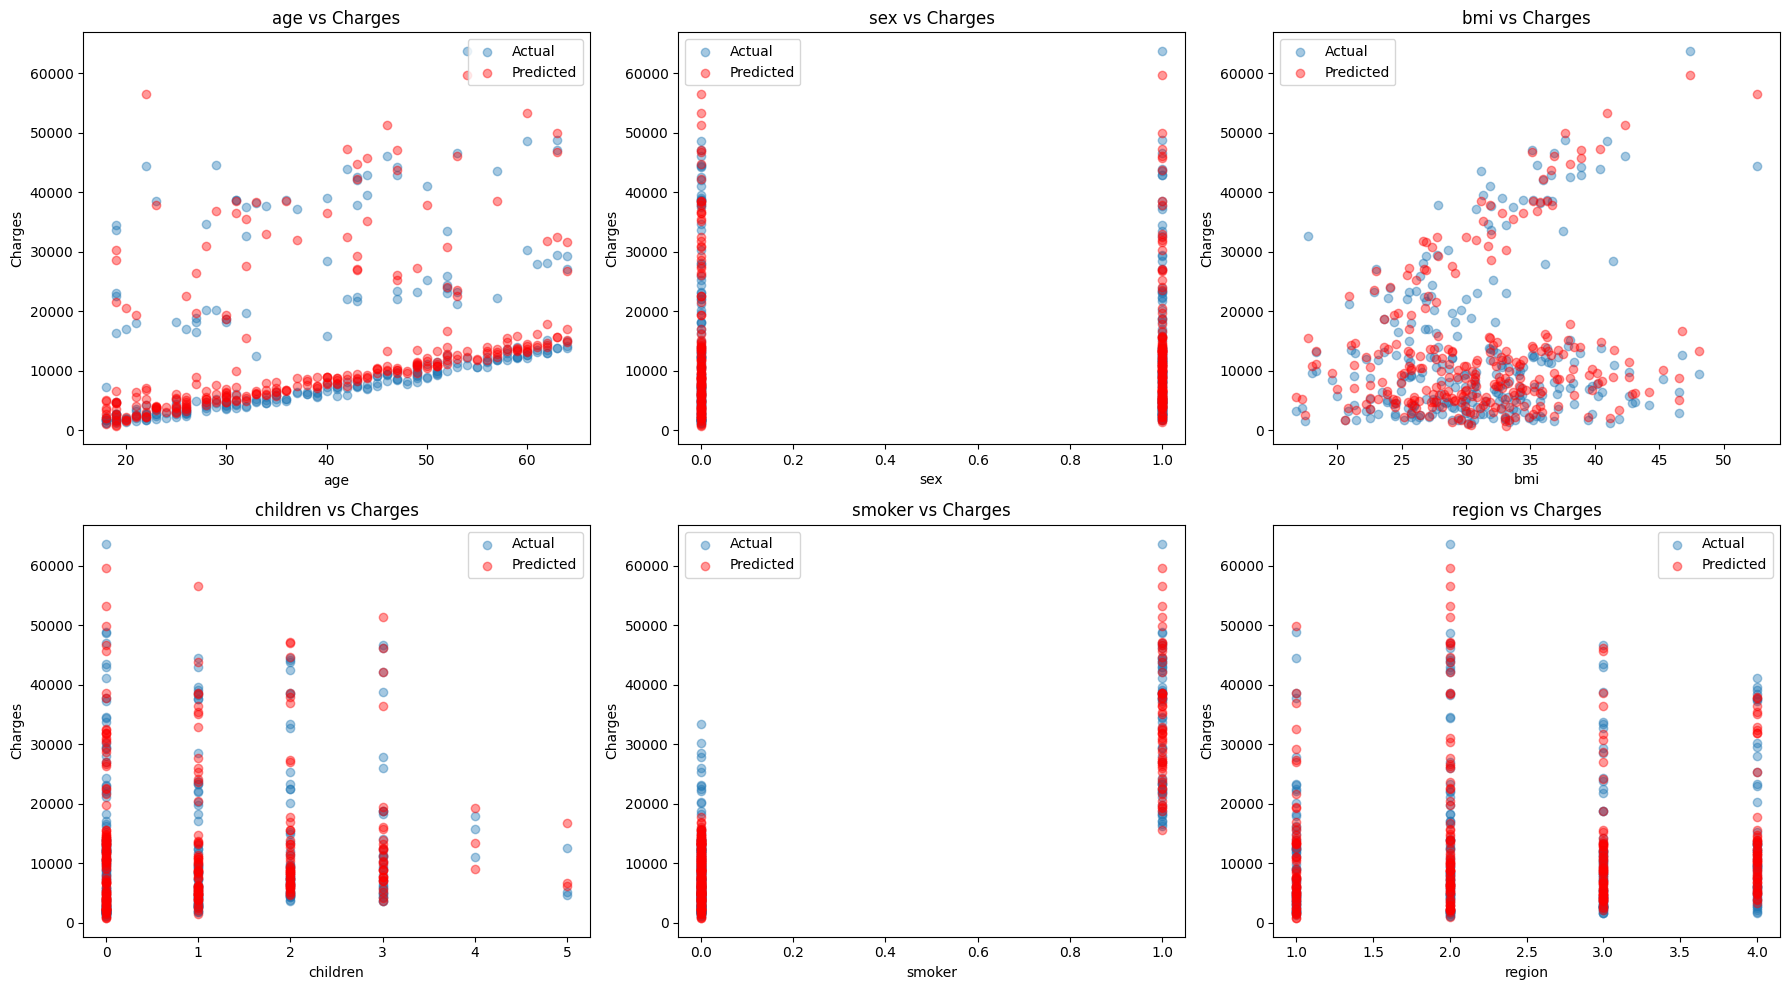

In [ ]:
epoch=2000

model.eval()
for i in range(epoch):
    model.train()
    y_pred=model(X_train)
    l=loss(y_pred,y_train)
    optimizer.zero_grad()
    l.backward()
    optimizer.step()
    if i % 1000 == 0:
        model.eval()
        with torch.no_grad():
            y_pred=model(X_test)
            l=loss(y_pred,y_test)
            print(f'epoch {i} loss {l}')
            # plot_loss(X_test[:,2].detach().numpy(),y_test.detach().numpy(),y_pred.detach().numpy())
            feature_names = ['age','sex','bmi','children','smoker','region']
            plot_all_features(X_test, y_test, y_pred, feature_names)


In [ ]:
# Example: age, sex, bmi, children, smoker, region
# Make sure the input features are in the same order and encoding as training data
sample_features = np.array([20, 0, 25, 0, 0, 3], dtype=np.float32)

# Convert to a PyTorch tensor and reshape for a single input (batch size of 1)
input_tensor = torch.tensor(sample_features).unsqueeze(0)

# Set the model to evaluation mode
model.eval()

# Make a prediction without tracking gradients
with torch.no_grad():
    predicted_charge_tensor = model(input_tensor)

# Get the scalar value from the tensor
predicted_charge = predicted_charge_tensor.item()

print(f"Predicted medical charge for the given features: {predicted_charge:.2f}")


Predicted medical charge for the given features: 2312.38


In [ ]:
age_18_data = acme_data[acme_data['age'] == 20]
display(age_18_data.head())

,age,sex,bmi,children,smoker,region,charges
64,20,1,22.420,0,1,3,14711.74380
105,20,0,28.025,1,1,3,17560.37975
122,20,1,28.975,0,0,3,2257.47525
134,20,1,28.785,0,0,4,2457.21115
166,20,1,37.000,5,0,1,4830.63000
